### Import

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller

### Create Artifical data

In [38]:
xvalues = np.linspace(0,2*np.pi*41,1000)
offset = 2
noiselevel = 0.1
sinusoidal_trend_1 = np.sin(xvalues)
sinusoidal_trend_2 = np.sin(xvalues*0.3)
linear_trend = np.linspace(0,0,1000)
noise = np.random.randn(1000)
signal = linear_trend + sinusoidal_trend_2 + sinusoidal_trend_1 + offset + noise*noiselevel

### White Noise

In [39]:
noise = np.random.randn(1000)

### Load Real World Datasets

In [40]:
daily_demand = pd.read_csv('../../data/time_series/daily_demand.csv',delimiter=';')
female_births = pd.read_csv('../../data/time_series/daily-total-female-births.csv')
airline_passengers = pd.read_csv('../../data/time_series/airline-passengers.csv')
energy_consumption = pd.read_csv('../../data/time_series/energy_consumption.csv')
consumption = energy_consumption['Consumption'].values
births = female_births['Births'].values
passengers = airline_passengers['Passengers']
daily_demand = daily_demand[['Banking orders (3)']].values

### Combine datasets

In [41]:
datasets = {}
datasets['consumption'] = consumption[::30]
# datasets['births'] = births
# datasets['passengers'] = passengers
# datasets['daily_demand'] = daily_demand
datasets['signal'] = signal

### Models

consumption
ADF Statistic: -1.176173
p-value: 0.683761
Critical Values:
	1%: -3.495
	5%: -2.890
	10%: -2.582

Number of Lags: 4
signal
ADF Statistic: -13.381951
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569

Number of Lags: 4


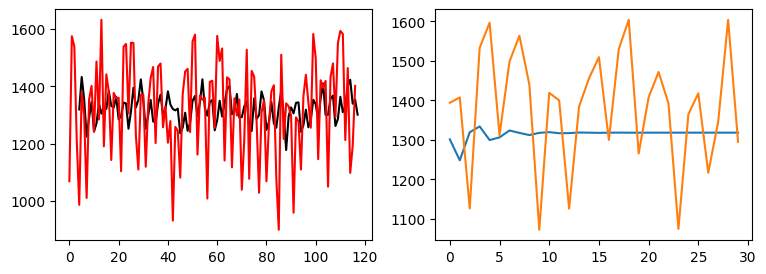

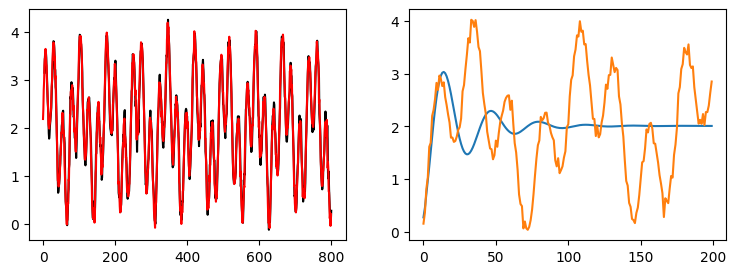

In [50]:
for key in datasets.keys():

    #Get Data
    print(key)
    data = datasets[key]
    split = int(len(data) * 0.8)
    train_data = data[:split]
    test_data = data[split:]
    
    #Test for Stationarity
    result = adfuller(train_data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))    
    print('')    
    
    #Determine the number of lags of the model
    vals,conf = pacf(train_data,alpha=.05)
    lower = (conf[:,0] < 0)*1.0
    upper = (conf[:,1] > 0)*1.0
    total = lower + upper
    for i in range(len(total)):
        if (total[i] > 1):
            no_lags = i-1
            break;

    no_lags = 4
    model = sm.tsa.AutoReg(train_data, lags=no_lags).fit()
    print('Number of Lags: ' + str(no_lags))
    
    #Predict
    plt.figure(figsize=(9,3))
    plt.subplot(1,2,1)
    pred = model.predict(start=0, end=len(train_data), dynamic=False)
    plt.plot(pred,'k')
    plt.plot(train_data,'r')
    
    #Forecast
    plt.subplot(1,2,2)
    no_forecasting_steps = len(test_data)
    fcast = model.forecast(steps=no_forecasting_steps)
    plt.plot(fcast)
    plt.plot(test_data)
    #print(model.summary())